In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/friends-series-dataset/friends_episodes_v2.csv
/kaggle/input/friends-series-dataset/friends_episodes_v3.csv


In [2]:
data = pd.read_csv("/kaggle/input/friends-series-dataset/friends_episodes_v2.csv")

In [3]:
data.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


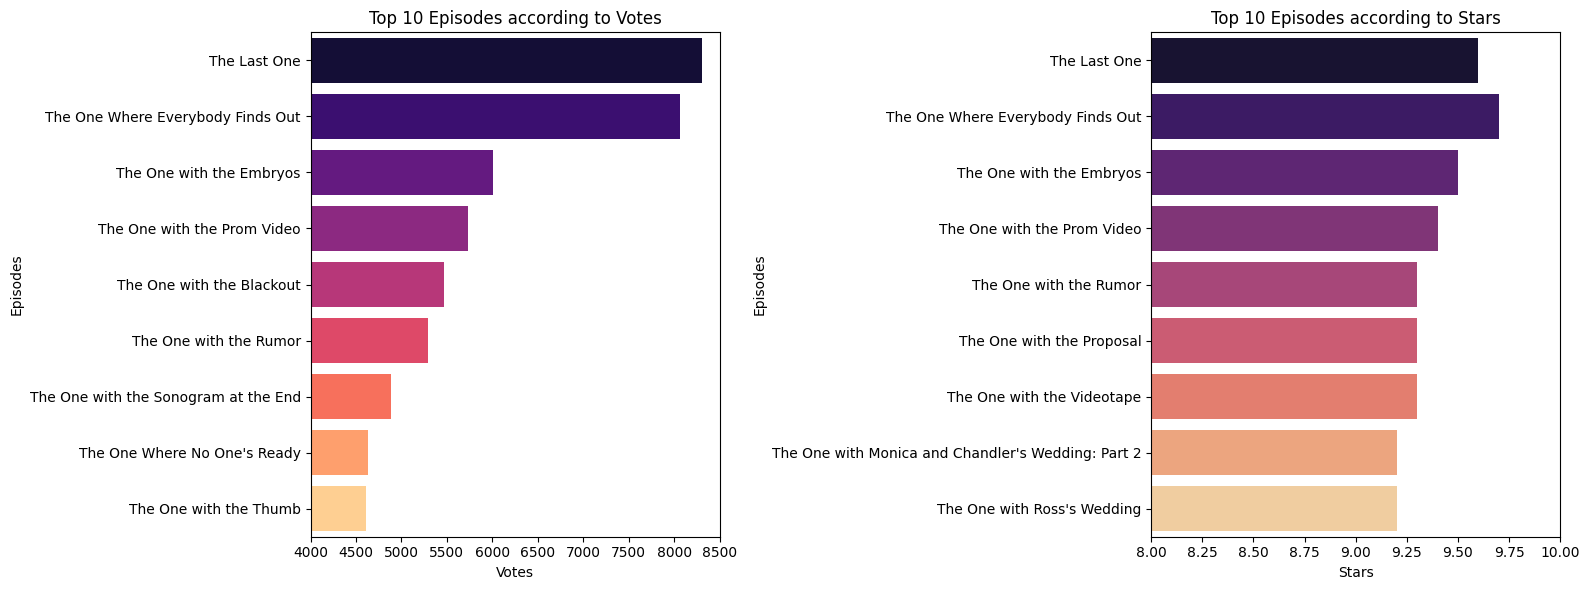

In [4]:
# Top 10 best episodes according to Votes
temp_votes = data.sort_values(by=["Votes"], ascending=False)[:10]
episodes_votes = list(temp_votes["Episode_Title"])
votes = list(temp_votes["Votes"])

# Top 10 best episodes according to Stars
temp_stars = data.sort_values(by=["Stars"], ascending=False)[:10]
episodes_stars = list(temp_stars["Episode_Title"])
stars = list(temp_stars["Stars"])

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Top 10 Episodes according to Votes
sns.barplot(x=votes, y=episodes_votes, palette='magma', ax=ax1, saturation=1, errorbar=None, capsize=0.2, errwidth=1)
ax1.set_xlabel('Votes')
ax1.set_ylabel('Episodes')
ax1.set_title('Top 10 Episodes according to Votes')
ax1.set_xlim(4000, 8500)

# Plot the Top 10 Episodes according to Stars
sns.barplot(x=stars, y=episodes_stars, palette='magma', ax=ax2, errorbar=None, capsize=0.2, errwidth=1)
ax2.set_xlabel('Stars')
ax2.set_xlabel('Stars')
ax2.set_ylabel('Episodes')
ax2.set_title('Top 10 Episodes according to Stars')
ax2.set_xlim(8, 10)



# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


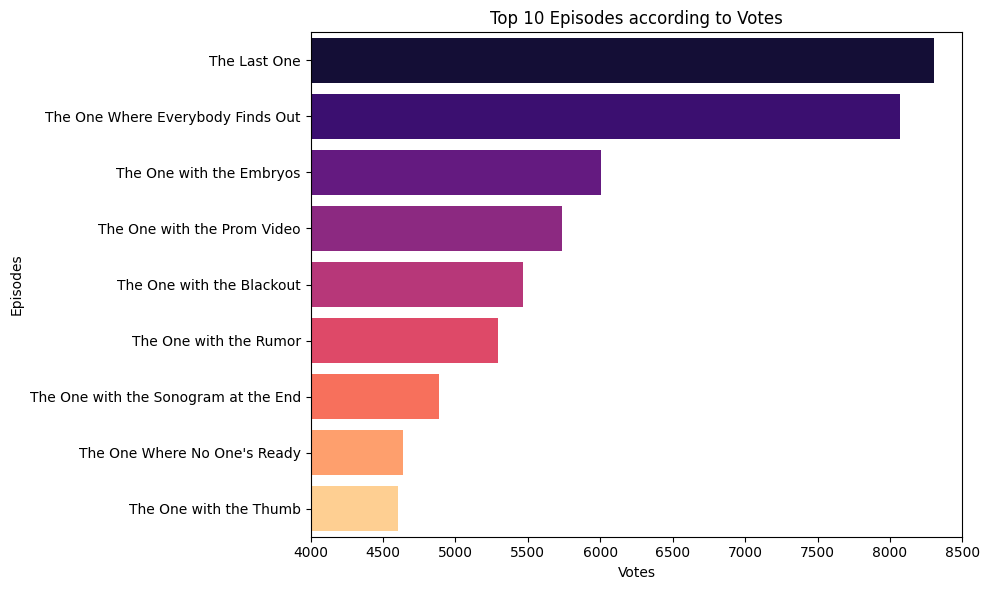

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the data and extracted the top 10 episodes by Votes as shown in your code

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Top 10 Episodes according to Votes
sns.barplot(x=votes, y=episodes_votes, palette='magma', ax=ax, errorbar=None, saturation=1, capsize=0.1)  # Adjust capsize to a smaller value
ax.set_xlabel('Votes')
ax.set_ylabel('Episodes')
ax.set_title('Top 10 Episodes according to Votes')
ax.set_xlim(4000, 8500)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


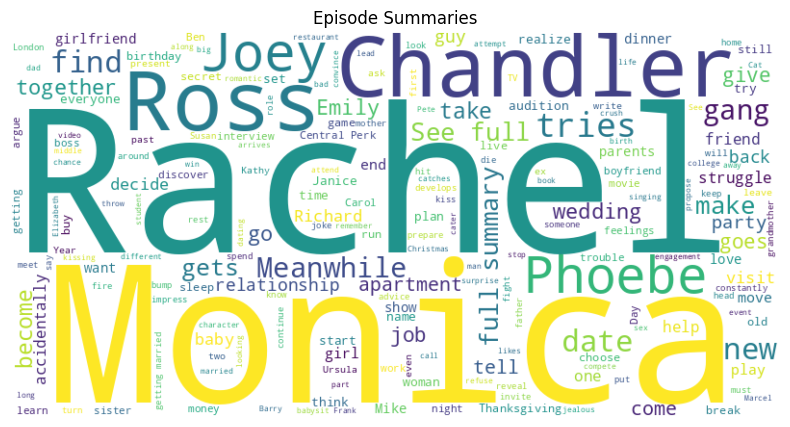

In [6]:
from wordcloud import WordCloud

# Combine all summaries into a single text
all_summaries = ' '.join(data['Summary'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Episode Summaries')
plt.show()


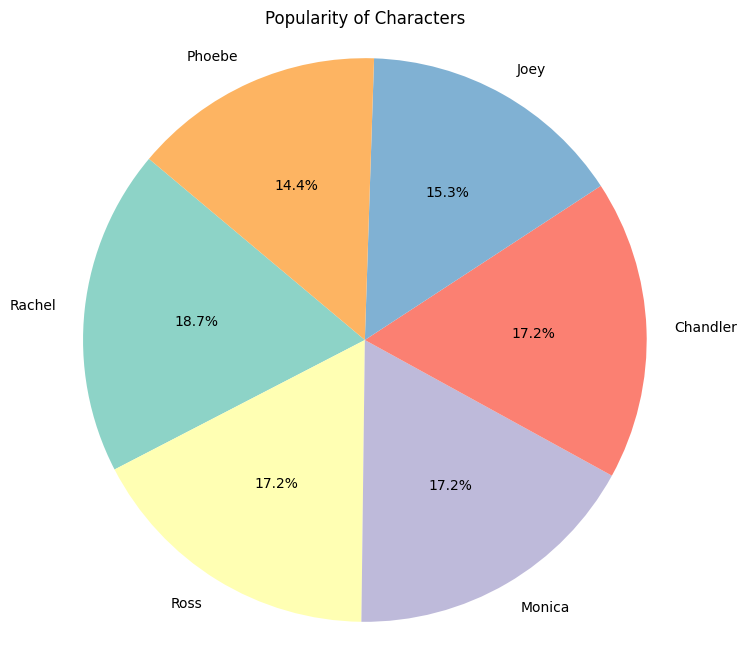

In [7]:
from collections import Counter

# Combine all summaries into a single text
all_summaries = ' '.join(data['Summary'])

# List of character names to look for in the summaries
character_names = ['Ross', 'Rachel', 'Monica', 'Chandler', 'Joey', 'Phoebe']

# Create a dictionary to count the frequency of each character's name
character_count = {name: 0 for name in character_names}

# Tokenize the text and count character frequencies
words = all_summaries.split()
for word in words:
    for name in character_names:
        if name.lower() in word.lower():
            character_count[name] += 1

# Create a DataFrame to display character frequencies
character_df = pd.DataFrame(character_count.items(), columns=['Character', 'Frequency'])
character_df = character_df.sort_values(by='Frequency', ascending=False)

# Print the DataFrame to see the character frequencies
# print(character_df)



# Use a predefined color map
colors = plt.cm.Set3(range(len(character_df)))

# Create a pie chart with the 'Set3' color map
plt.figure(figsize=(8, 8))
plt.pie(character_df['Frequency'], labels=character_df['Character'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Popularity of Characters')
plt.show()


In [8]:
def chandler_significant_role(summary):
    chandler_keywords = ["Chandler", "Bing", "Matthew Perry"]  # Adjust keywords as needed
    summary = summary.lower()
    for keyword in chandler_keywords:
        if keyword.lower() in summary:
            return True
    return False

# Apply the function to check for significant Chandler role for each episode
data['Chandler_Significant_Role'] = data['Summary'].apply(chandler_significant_role)

# # Count the number of episodes where Chandler plays a significant role
# num_episodes_chandler_significant_role = data['Chandler_Significant_Role'].sum()

# # Display the number of episodes where Chandler plays a significant role
# print("Number of episodes where Chandler plays a significant role:", num_episodes_chandler_significant_role)

In [9]:
# Create a function to check if Chandler plays a significant role in the summary
def chandler_significant_role(summary):
    chandler_keywords = ["Chandler", "Bing", "Matthew Perry"]  # Adjust keywords as needed
    summary = summary.lower()
    for keyword in chandler_keywords:
        if keyword.lower() in summary:
            return True
    return False

# Create a new column to count the occurrences of Chandler's significant role
data['Chandler_Role_Count'] = data['Chandler_Significant_Role'].astype(int)

# Create a bubble chart to visualize episodes where Chandler plays a significant role
fig = px.scatter(data, x='Episode_Title', y=data['Chandler_Role_Count'], 
                 size='Chandler_Role_Count', color='Chandler_Significant_Role')

fig.update_layout(
    title='Most Frequent Chandler Mentions!',
    xaxis_title='Episode Title',
    yaxis_title='Chandler Count',
    showlegend=False  # Hide the legend
)

# Customize the y-axis tick values
fig.update_yaxes(
    tickvals=[]  # Replace with the desired tick values
)


fig.show()


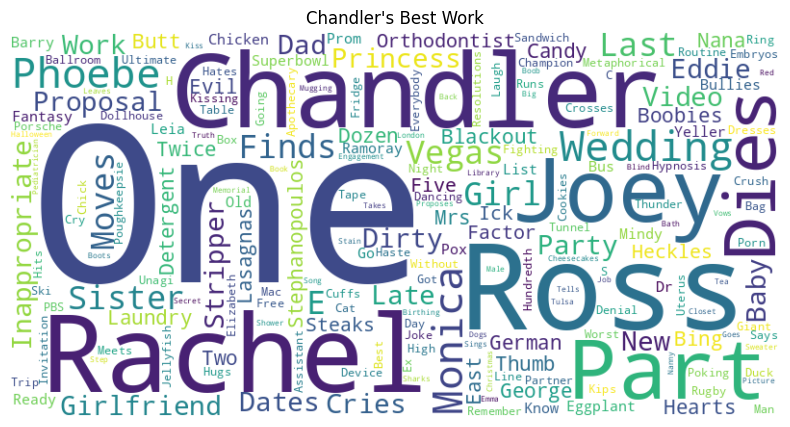

In [10]:
#  Filter episode titles where Chandler plays a significant role
significant_episodes = data[data['Chandler_Significant_Role']]

# Create a text from episode titles for the word cloud
text = " ".join(significant_episodes['Episode_Title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Add the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Chandler's Best Work")
plt.show()

# # Display the number of episodes where Chandler plays a significant role
# print("Number of episodes where Chandler plays a significant role:", num_episodes_chandler_significant_role)

[14, 17, 11, 21, 15, 18, 13, 15, 16, 10]


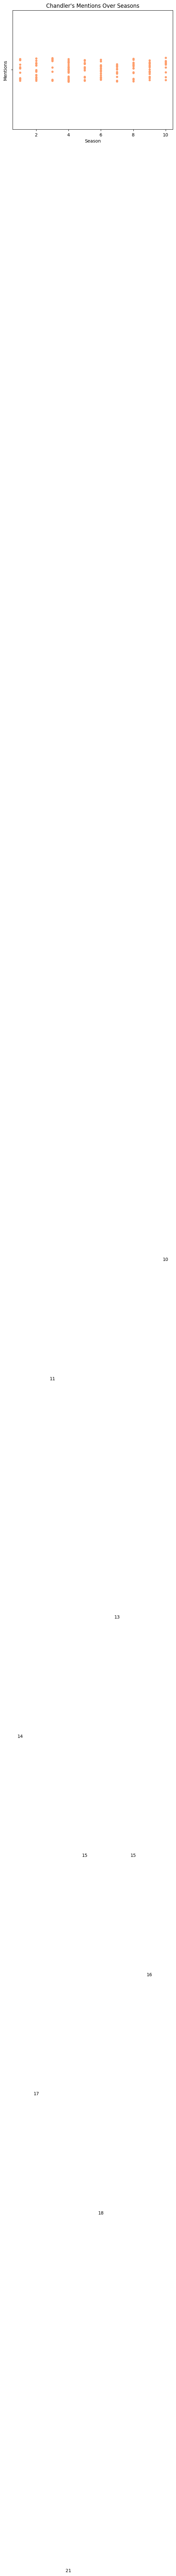

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to check if Chandler has a significant role in the summary
def chandler_significant_role(summary):
    chandler_keywords = ["Chandler", "Bing", "Matthew Perry"]  # Adjust keywords as needed
    summary = summary.lower()
    for keyword in chandler_keywords:
        if keyword.lower() in summary:
            return True
    return False

# Apply the function to check for significant Chandler role for each episode
data['Chandler_Significant_Role'] = data['Summary'].apply(chandler_significant_role)

# Add a new column for the season number
data['Season'] = data['Season'].astype(int)


# Use the "magma" color palette
cmap = plt.get_cmap("magma")

sns.stripplot(x='Season', data=data[data['Chandler_Significant_Role']], jitter=True, color=cmap(0.8))

# Calculate mention counts
counts = data[data['Chandler_Significant_Role']].groupby('Season').size()
seasons = counts.index.tolist()
mention_counts = counts.tolist()
print(mention_counts)

# Add mention counts as numbers on the dots
for season, mention_count in zip(seasons, mention_counts):
    plt.text(season, mention_count, str(mention_count), ha='center', va='bottom', fontsize=10, color='black')

# Add mention counts on the y-axis
plt.title("Chandler's Mentions Over Seasons")
plt.xlabel('Season')
plt.ylabel('Mentions')

plt.show()

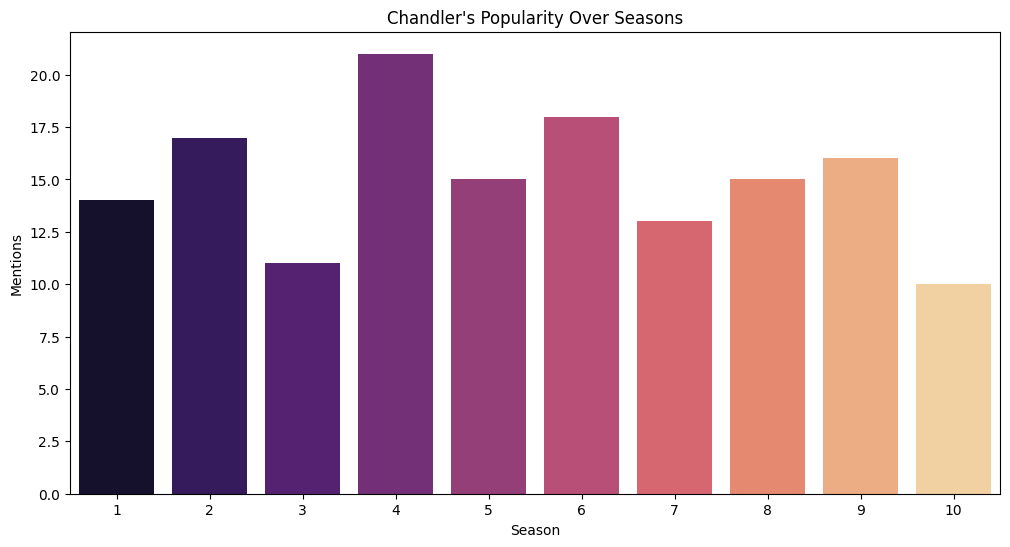

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to check if Chandler has a significant role in the summary
def chandler_significant_role(summary):
    chandler_keywords = ["Chandler", "Bing", "Matthew Perry"]  # Adjust keywords as needed
    summary = summary.lower()
    for keyword in chandler_keywords:
        if keyword.lower() in summary:
            return True
    return False

# Apply the function to check for significant Chandler's role for each episode
data['Chandler_Significant_Role'] = data['Summary'].apply(chandler_significant_role)

# Add a new column for the season number
data['Season'] = data['Season'].astype(int)

# Use the "magma" color palette
cmap = plt.get_cmap("magma")

# Calculate mention counts
mention_counts = data[data['Chandler_Significant_Role']].groupby('Season').size().reset_index(name='Mentions')

# Create a bar plot to show Chandler's mentions over seasons
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Mentions', data=mention_counts, palette="magma")

# Add mention counts on the y-axis
plt.title("Chandler's Popularity Over Seasons")
plt.xlabel('Season')
plt.ylabel('Mentions')

plt.show()


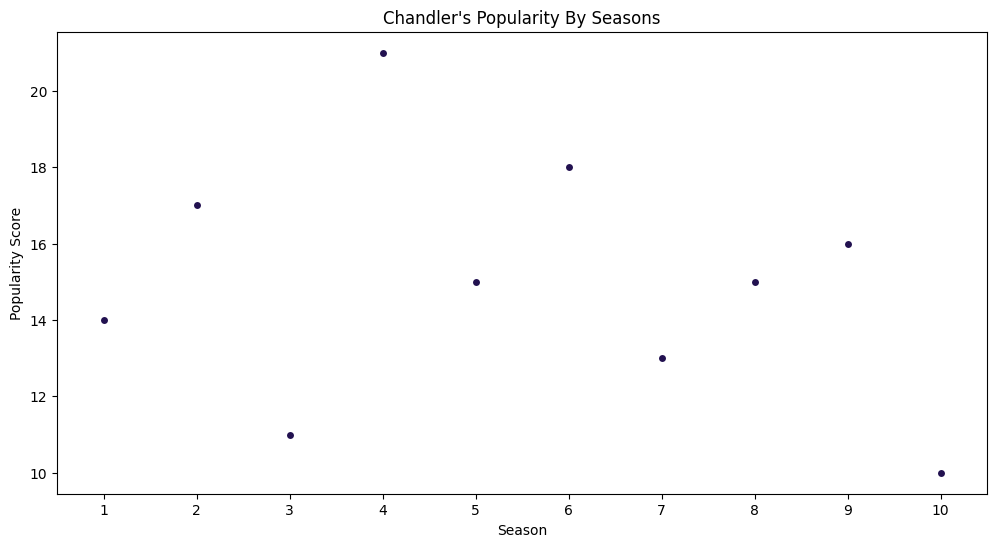

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration purposes
data = {
    'Season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Popularity': [14, 17, 11, 21, 15, 18, 13, 15, 16, 10]  # Replace with your actual data
}

# Set the color palette to "magma"
sns.set_palette("magma")

# Create a swarm plot
plt.figure(figsize=(12, 6))

# Plot the swarm plot with a constant hue
sns.swarmplot(x='Season', y='Popularity', data=data)

# Set axis labels and title
plt.title("Chandler's Popularity By Seasons")
plt.xlabel('Season')
plt.ylabel('Popularity Score')

plt.show()
